In [1]:
!pip install pandas pandas-ta

In [2]:
import pandas_ta as ta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils import load_dataset

In [3]:
df = load_dataset('./NFLX.csv')
df = df.iloc[::-1]
df = df.reset_index(drop=True)

In [4]:
df

,Close,Volume,Open,High,Low
0,36.9814,21354409,36.1728,37.1643,35.8758
1,37.1114,15494785,36.8571,37.6428,36.8214
2,39.0414,30108269,37.5614,39.0771,37.5000
3,38.6243,21240197,38.9843,39.2357,38.2143
4,38.5357,9961507,38.9314,39.0657,38.3186
...,...,...,...,...,...
2510,438.3000,3767195,440.3600,443.5700,435.1000
2511,428.9000,3846639,439.7400,440.6200,427.5900
2512,429.9800,5467607,431.1200,438.1200,428.6900
2513,421.6600,3927914,428.9800,430.6317,421.3277


In [5]:
df.iloc[0]

Close     3.698140e+01
Volume    2.135441e+07
Open      3.617280e+01
High      3.716430e+01
Low       3.587580e+01
Name: 0, dtype: float64

In [6]:
df.iloc[2]

Close     3.904140e+01
Volume    3.010827e+07
Open      3.756140e+01
High      3.907710e+01
Low       3.750000e+01
Name: 2, dtype: float64

In [7]:
prices = df.loc[:, 'Close'].to_numpy()

In [8]:
ma1 = df.ta.sma(length=20).to_numpy()
ma1 = np.where(np.isfinite(ma1), ma1, 0)

ma2 = df.ta.sma(length=50).to_numpy()
ma2 = np.where(np.isfinite(ma2), ma2, 0)

ma3 = df.ta.sma(length=100).to_numpy()
ma3 = np.where(np.isfinite(ma3), ma3, 0)

In [9]:
frame_start = 0
frame_end = 500
prices = prices[frame_start:frame_end]
#rsi = rsi[frame_start:frame_end]
ma1 = ma1[frame_start:frame_end]
ma2 = ma2[frame_start:frame_end]
ma3 = ma3[frame_start:frame_end]
prices.size

500

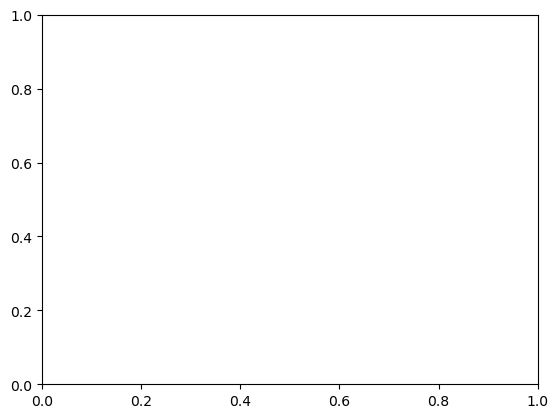

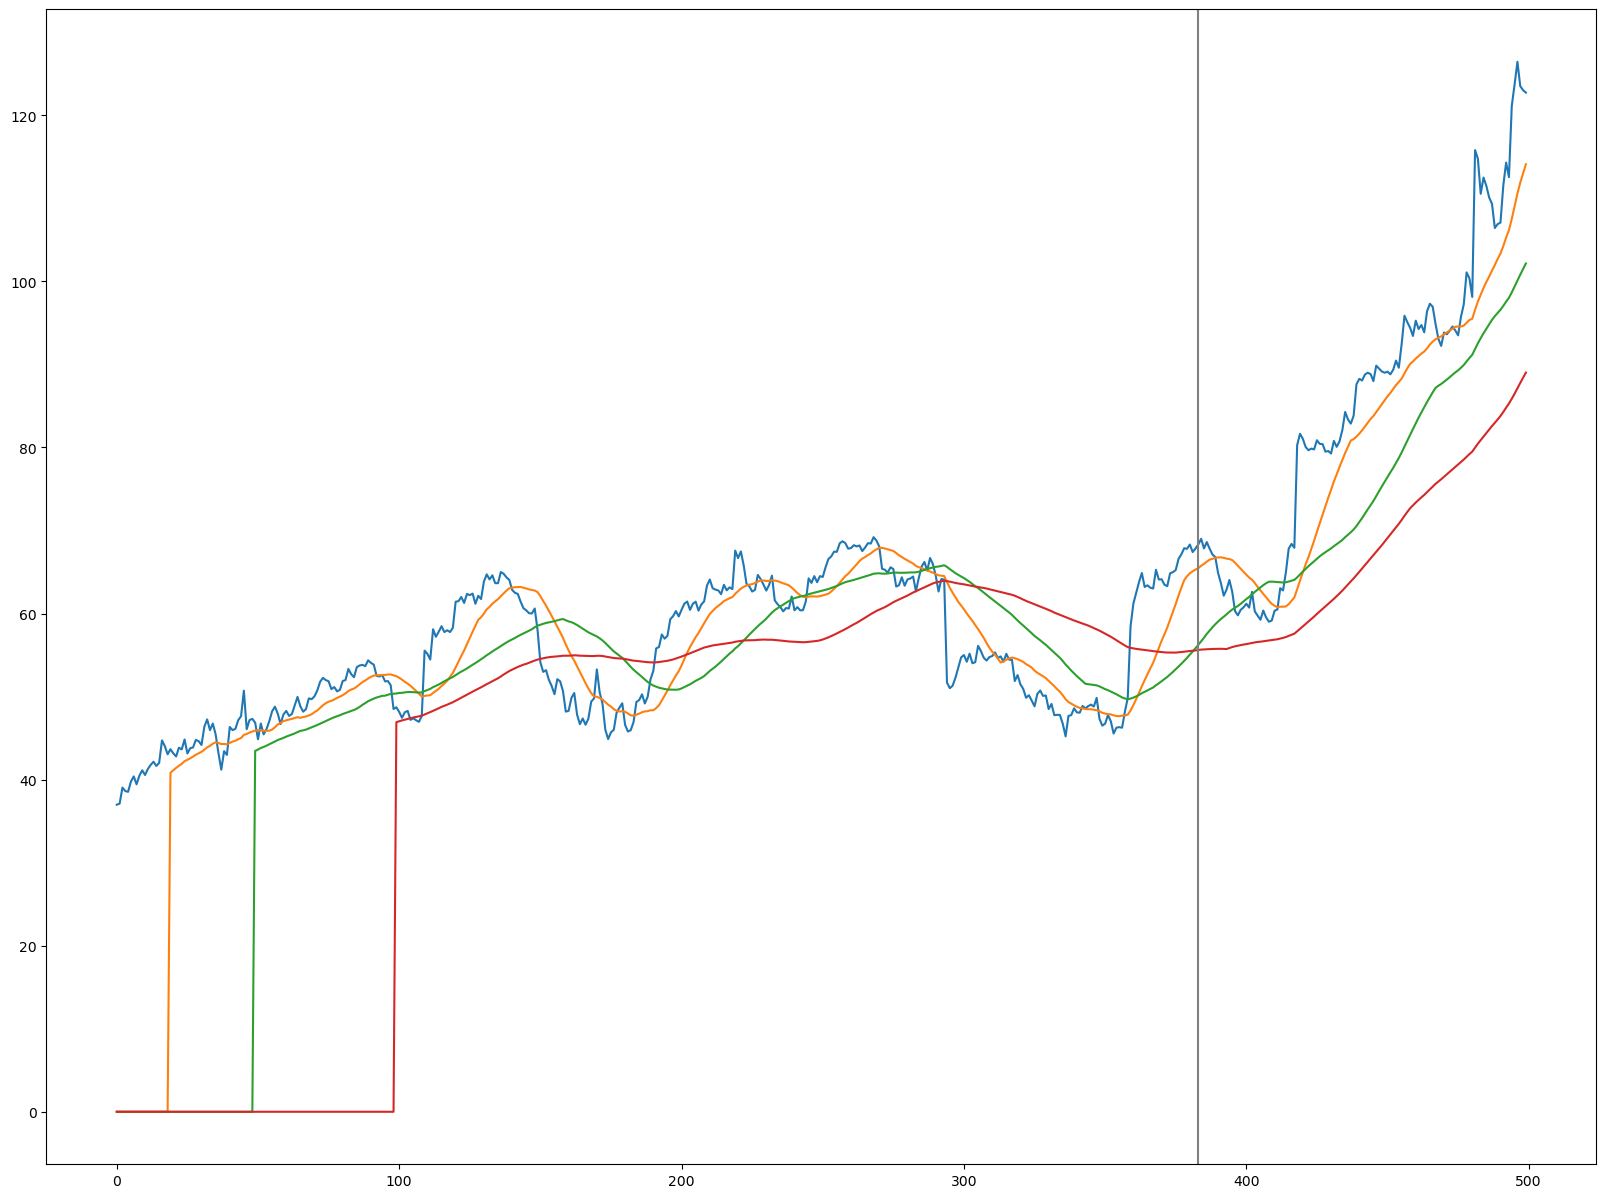

In [14]:
plt.cla()
plt.figure(figsize=(20, 15))
plt.plot(prices)
#plt.plot(rsi)
plt.plot(ma1)
plt.plot(ma2)
plt.plot(ma3)

frames = range(0, prices.size, 20)
plt.axvline(x=383, color='gray')
#for x in frames:
#    plt.axvline(x=x, color='gray')
#plt.show()
plt.savefig('./test.png')